In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
DATA_PATH = 'data/'
DATASET = 'merged_data_clean.csv'

df = pd.read_csv(DATA_PATH + DATASET)

In [3]:
# Scale Data
from sklearn.preprocessing import StandardScaler
numeric_data = df.select_dtypes(include=[float, int])
scaled_data = StandardScaler().fit_transform(numeric_data)
scaled_data.shape

(129, 102)

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'UMAP of Non-Encoded Data with Bank Score')

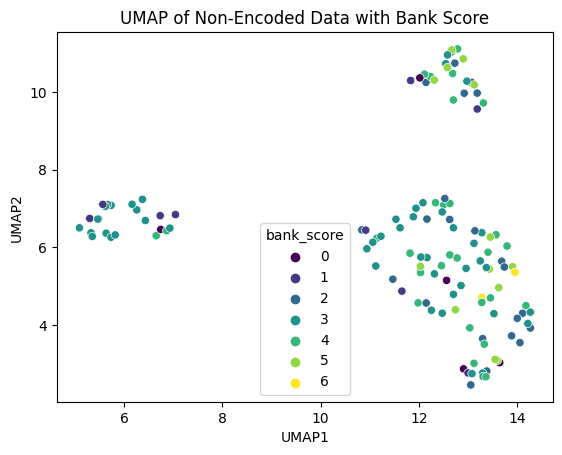

In [7]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
score = df['Pounds of Food Distributed'] / df['TractLOWI']
min_score = np.min([val for val in score if val > 0.0])
imputed_score = np.array([min_score if val == 0.0 else val for val in score])
umap_df['bank_score'] = pd.cut(np.log(imputed_score), bins=7, labels=False)

plt.figure()
sns.scatterplot(
    x="UMAP1", y="UMAP2",
    hue="bank_score",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=umap_df,
    legend="auto"
)

plt.title("UMAP of Non-Encoded Data with Bank Score")

In [9]:
from umap.parametric_umap import ParametricUMAP
reducer = ParametricUMAP(n_training_epochs=100)
embedding = reducer.fit_transform(scaled_data)

umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
score = df['Pounds of Food Distributed'] / df['TractLOWI']
min_score = np.min([val for val in score if val > 0.0])
imputed_score = np.array([min_score if val == 0.0 else val for val in score])
umap_df['bank_score'] = pd.cut(np.log(imputed_score), bins=7, labels=False)

plt.figure()
sns.scatterplot(
    x="UMAP1", y="UMAP2",
    hue="bank_score",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=umap_df,
    legend="auto"
)

plt.title("Parametric UMAP of Non-Encoded Data with Bank Score")

c:\ProgramData\anaconda3\envs\4774-env\Lib\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


Epoch 1/10000
311/311 [==============================] - 3s 3ms/step - loss: 0.2986
Epoch 2/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2906
Epoch 3/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2888
Epoch 4/10000
311/311 [==============================] - 1s 3ms/step - loss: 0.2900
Epoch 5/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2904
Epoch 6/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2898
Epoch 7/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2907
Epoch 8/10000
311/311 [==============================] - 1s 3ms/step - loss: 0.2903
Epoch 9/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2912
Epoch 10/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2896
Epoch 11/10000
311/311 [==============================] - 1s 4ms/step - loss: 0.2888
Epoch 12/10000
311/311 [==============================] - 1s 4ms/step - lo

KeyboardInterrupt: 